# AI for Business (BUAN 617)
## Project 2
## Term: Fall 2023 | Student Name: Mohammed Rayanuddin | Student ID:
---

### #01: Find a business dataset that contains a minimum of 10 columns and 100 rows.
After performing a extensive search in Google datasets, Kaggle, GitHub, and other open data sources. I found [Titanic Dataset](https://www.kaggle.com/datasets/brendan45774/test-file) from Kaggle as the closest fit for this project.

In [1]:
# import essential packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import permutation_test_score, KFold

In [2]:
# read data from CSV
OD_data = pd.read_csv("tested.csv")

In [3]:
# is the dataset having minimum 10 cols and 100 rows?
OD_data.shape

(418, 12)

In [4]:
# Statistical descriptions
OD_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
OD_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
OD_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### #02: Partition the data into two parts, the training data D1 and the test data D2, with a ratio of 2:1.

For regression problem, there should be X (independent variables) and y (dependent varable). The dependent variable should be continuous and numerical and the independent variable should be in numerical either discerte or continous to train and test regression models.

In [7]:
# converting sex in string to numerical
def sex_encoder(x):
    if x in ['male', 'female']:
        if x == 'male':
            return 1
        else:
            return 0
OD_data['Sex#'] = OD_data['Sex'].apply(sex_encoder)

In [8]:
OD_data['Sex#'].value_counts()

1    266
0    152
Name: Sex#, dtype: int64

In [9]:
# check for null values
OD_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex#             0
dtype: int64

In [10]:
# fill null values of `Age` with average age
OD_data['Age'].fillna(value = OD_data['Age'].mean(), inplace=True)

In [11]:
# delete the row having null value in `Fare`
OD_data.dropna(subset=['Fare'], inplace=True)

In [12]:
# feature selection
OD_data.corr()['Fare']

PassengerId    0.008211
Survived       0.191514
Pclass        -0.577147
Age            0.329071
SibSp          0.171539
Parch          0.230046
Fare           1.000000
Sex#          -0.191514
Name: Fare, dtype: float64

`PassengerId`, `Name`, `Tickect`, `Cabin`, `Embarked` attributes are in string object and discrete datapoints. Therefore determined having no impact on `Fare`. So removing from `X` (independent attreibute list).

{'whiskers': [<matplotlib.lines.Line2D at 0x1f45f081370>,
 'caps': [<matplotlib.lines.Line2D at 0x1f45f0819d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f45f0810a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f45f081eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f45f7341c0>],
 'means': []}

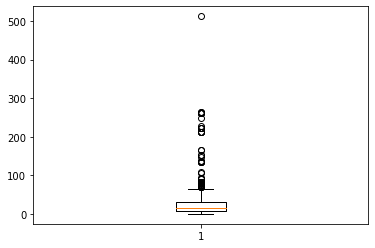

In [13]:
plt.boxplot(OD_data['Fare'])

In [14]:
# remove datapoints with `Fare` more than 50
OD_data = OD_data[OD_data['Fare'] <= 50]

In [15]:
#X = OD_data[['Survived', 'Pclass', 'Age', 'Sex#', 'SibSp', 'Parch']]
X = OD_data[['Survived', 'Pclass', 'Age', 'Sex#']]
y = OD_data['Fare']
#y = OD_data['Survived']
D1_X, D2_X, D1_y, D2_y = train_test_split(X, y, test_size = float(1/3), random_state = 42)

`D1_X`, `D1_y` are training set <br>
`D2_X`, `D2_y` are testing set

### #03: (Polynomial regression) We now build a polynomial regression model. Fit the polynomial regression using the training data D1.

In [16]:
# transform the data into polynomial equation
poly = PolynomialFeatures(degree = 1, include_bias = False)
poly.fit(X)
poly_D1_X = poly.transform(D1_X)
poly_D2_X = poly.transform(D2_X)

In [17]:
# train polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_D1_X, D1_y)

LinearRegression()

In [18]:
print(poly_reg_model.intercept_, poly_reg_model.coef_)

39.38645455544929 [ 1.69068775 -8.77847732 -0.05326329 -1.69068775]


### #04: Apply the polynomial regression model to the test data D2. Present the Mean squared error and Coefficient of determination.

In [19]:
# predit values of test data
D2_y_pred = poly_reg_model.predict(poly_D2_X)

In [20]:
print(f"Mean squared error: {mean_squared_error(D2_y, D2_y_pred):.3f}")
print(f"Coefficient of determination: {r2_score(D2_y, D2_y_pred):.2f}")

Mean squared error: 60.741
Coefficient of determination: 0.43


### #05: Find the p-value of the polynomial regression model and interpret the p-value.

In [21]:
def interpret_pvalue(model, X, y, line = True):
    pvalue = permutation_test_score(model, X, y)
    print(f"p-value: {pvalue[2]:.4f}")
    if line == True:
        if pvalue[2] <= 5e-2:
            print("Low p-value")
        else:
            print("High p-value")

In [22]:
interpret_pvalue(poly_reg_model, X, y)

p-value: 0.0099
Low p-value


### #06: Draw a scatter plot between the actual test value versus the predicted values.

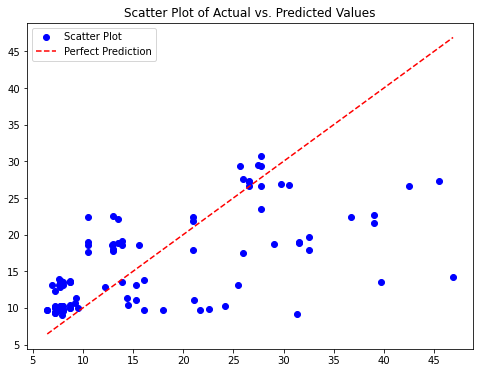

In [23]:
def plot_act_test(x, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Scatter Plot')
    plt.plot([min(x), max(x)], [min(x), max(x)], linestyle='--', color='red', label='Perfect Prediction')
    plt.title('Scatter Plot of Actual vs. Predicted Values')
    plt.legend()
    plt.show()
plot_act_test(D2_y, D2_y_pred)

### #07:  (Logistic regression) Apply the cross-validation techniques (5-fold) for constructing the logistic regression model. Present the Mean squared error and p-value for each of the 5 folds respectively in a table.

logistic regression can only be used on discrete dependent variables lets make some changes to `X` and `y`. As I am workin with discrete variables the error metrics consisted to be `accuracy` instead of `mean squared error`.

In [24]:
# feature selection
OD_data.corr()['Survived']

PassengerId   -0.049522
Survived       1.000000
Pclass         0.031464
Age           -0.099833
SibSp          0.103704
Parch          0.197314
Fare           0.128828
Sex#          -1.000000
Name: Survived, dtype: float64

In [25]:
OD_data['Survived'].value_counts()

0    228
1    109
Name: Survived, dtype: int64

In [26]:
X = OD_data[['Sex#', 'SibSp', 'Parch', 'Fare']].to_numpy()
y = OD_data['Survived'].to_numpy()

In [27]:
log_reg_model = LogisticRegression()

In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
fold=1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # p-value
    pvalue = permutation_test_score(model, X_test, y_test)
    
    # Evaluate the model on the test data
    accuracy = model.score(X_test, y_test)
    print(f"Fold {fold} - Test Accuracy: {accuracy:.2f} - p-value: {pvalue[2]:.4f}")
    y_pred = model.predict(X_test)
    fold+=1

Fold 1 - Test Accuracy: 1.00 - p-value: 0.0099
Fold 2 - Test Accuracy: 1.00 - p-value: 0.0099
Fold 3 - Test Accuracy: 1.00 - p-value: 0.0099
Fold 4 - Test Accuracy: 1.00 - p-value: 0.0099
Fold 5 - Test Accuracy: 1.00 - p-value: 0.0099


### #08: Draw a scatter plot between the actual test value versus the predicted values.

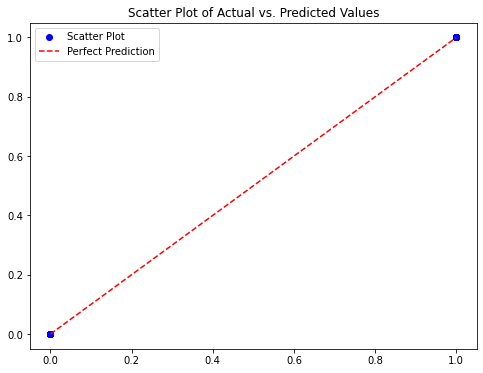

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, color='blue', label='Scatter Plot')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--',
         color='red', label='Perfect Prediction')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

-- the end --